In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
!ls
%cd './drive/MyDrive/Movie/Movie-Genre-Prediction-'
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
drive  sample_data
/content/drive/MyDrive/Movie/Movie-Genre-Prediction-
/content/drive/MyDrive/Movie/Movie-Genre-Prediction-


In [2]:

import pandas as pd
import requests
import os
from utils import *
import glob 
from sklearn.model_selection import train_test_split
from model import CNN,analysis

In [3]:
'''
Creation of DataFrame and using only the Columns of Title,Rating,Genre and PosterLink
'''

data=pd.read_csv("./archive/MovieGenre.csv",encoding='latin-1',usecols=['imdbId','Title','IMDB Score','Genre','Poster'])

In [4]:
data.head()

,imdbId,Title,IMDB Score,Genre,Poster
0,114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [5]:
print(data.dtypes)
print("\nNumber of Rows " + str(data.shape[0]))


imdbId          int64
Title          object
IMDB Score    float64
Genre          object
Poster         object
dtype: object

Number of Rows 40108


In [6]:
print(data.isnull().sum())
print("\n Number of Duplicated Entries : "+str(data.duplicated(subset='Title').sum()))

imdbId          0
Title           0
IMDB Score     48
Genre         145
Poster        725
dtype: int64

 Number of Duplicated Entries : 638


In [7]:
#Handling Missing Values,Since Each Data is Independent ,We can Drop the Rows with Missing values
data.dropna(axis=0,inplace=True)
data.drop_duplicates(subset='Title',inplace=True)
print(data.shape)

(38611, 5)


<h1>Data Analysis</h1>

In [8]:
import matplotlib.pyplot as plt 
print("Number of Movies : "+str(len(list(data.Title))))
genrelist=[]

for index,rows in data.iterrows():
    genre=str(rows.Genre)
    genre=genre.split('|')
    genrelist.extend(genre)
print("Number of Unique Genre are :"+str(len(list(set(genrelist)))))
print("Unique Genre are "+str(list(set(genrelist))))

Number of Movies : 38611
Number of Unique Genre are :28
Unique Genre are ['Western', 'Adult', 'Documentary', 'Adventure', 'Biography', 'Horror', 'Family', 'Music', 'Drama', 'Game-Show', 'Musical', 'Animation', 'Comedy', 'History', 'Action', 'Thriller', 'News', 'War', 'Romance', 'Film-Noir', 'Mystery', 'Sci-Fi', 'Talk-Show', 'Reality-TV', 'Fantasy', 'Sport', 'Short', 'Crime']


Western 832
Adult 9
Documentary 3495
Adventure 3735
Biography 1928
Horror 3923
Family 2060
Music 1243
Drama 19496
Game-Show 1
Musical 826
Animation 1683
Comedy 12361
History 1372
Action 5224
Thriller 4719
News 78
War 1139
Romance 6060
Film-Noir 395
Mystery 2348
Sci-Fi 1967
Talk-Show 6
Reality-TV 2
Fantasy 1971
Sport 682
Short 915
Crime 5150


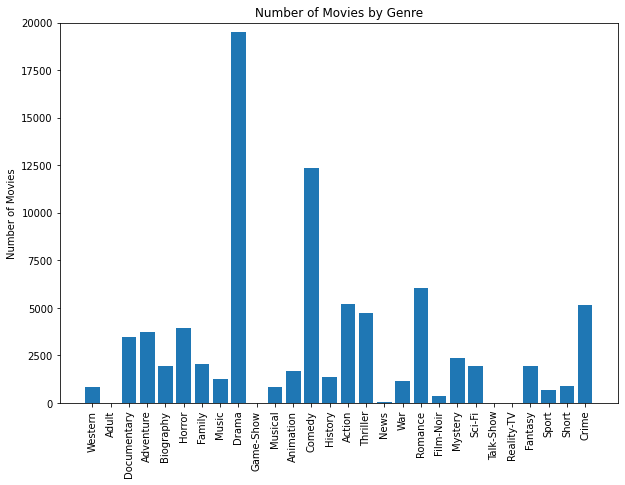

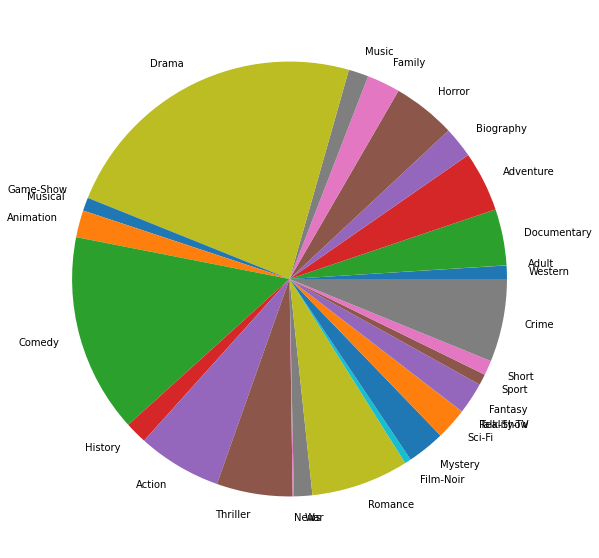

In [9]:
import numpy as np
unique_genres=list(set(genrelist))
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
fig1=plt.figure(figsize=(10,7))
plt.bar(y_pos,countlist,align='center',alpha=1,linewidth=1)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylim(0,20000)
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

fig=plt.figure(figsize=(15,10))
plt.pie(countlist,labels=unique_genres)
plt.show()


Western : 6.358774
Adult : 4.322222
Documentary : 7.296938
Adventure : 6.281312
Biography : 7.058662
Horror : 5.351083
Family : 6.317621
Music : 6.753461
Drama : 6.645620
Game-Show : 5.500000
Musical : 6.598305
Animation : 6.833155
Comedy : 6.276450
History : 7.094315
Action : 5.974464
Thriller : 5.911274
News : 7.307692
War : 6.907024
Romance : 6.520693
Film-Noir : 6.958481
Mystery : 6.304557
Sci-Fi : 5.500610
Talk-Show : 7.916667
Reality-TV : 5.700000
Fantasy : 6.156367
Sport : 6.591202
Short : 7.065792
Crime : 6.455767


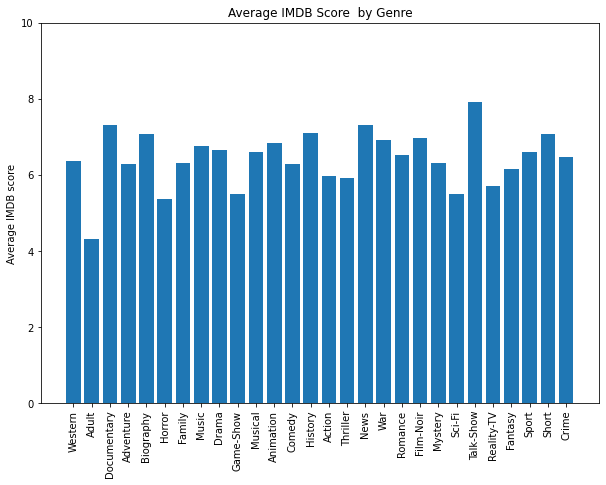

In [10]:
avg_list=[]
for genre in unique_genres:
    movie_genre=data[data['Genre'].str.contains(genre,na=False)]
    avg=movie_genre['IMDB Score'].mean()
    avg_list.append(avg)
    print("%s : %f"%(genre,avg))

y_pos = np.arange(len(unique_genres))
fig1=plt.figure(figsize=(10,7))
plt.bar(y_pos,avg_list,align='center',alpha=1,linewidth=1)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylim(0,10)
plt.ylabel("Average IMDB score")
plt.title("Average IMDB Score  by Genre")
plt.show()


In [11]:
from collections import Counter
import random
#DataSet Preparation for Training of the Model from the Sample Posters provided of 1000 Images
image_path=glob.glob("./new/*.jpg")
x=[]
y=[]
size=224
classes=tuple()
print(len(image_path),image_path[0])
i=1
for path in image_path:
    if i%100==0:
      print(i)
    img_id=int(path.split('/')[-1][:-4])
    x.append(preprocess(path,size=224))
    y.append(np.asarray(get_genre(data,img_id)))   
    classes=classes+get_genre(data,img_id)
    i+=1
count=dict(Counter(classes))
classes=set(classes)

1900 ./new/60660.jpg
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


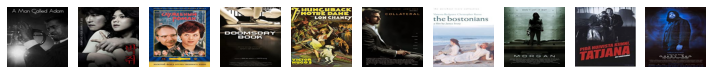

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'Action': 267,
 'Adventure': 200,
 'Animation': 79,
 'Biography': 104,
 'Comedy': 643,
 'Crime': 256,
 'Documentary': 163,
 'Drama': 930,
 'Family': 97,
 'Fantasy': 99,
 'Film-Noir': 19,
 'History': 64,
 'Horror': 182,
 'Music': 58,
 'Musical': 33,
 'Mystery': 112,
 'News': 6,
 'Romance': 315,
 'Sci-Fi': 80,
 'Short': 48,
 'Sport': 26,
 'Thriller': 241,
 'War': 44,
 'Western': 36}

In [12]:
display_poster(x[0:10])
x=np.asarray(x,dtype=np.float)
y=np.asarray(y)
count

In [13]:
y,genre=Binarizer(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.1)
print("Number of training Samples: "+str(x_train.shape[0]))
print("Number of testing Samples: "+str(x_test.shape[0]))
## MODEL##Loading...
print("Size of Image is "+str((x_train.shape[1],x_train.shape[2])))
print("list of Genre are",genre)

Number of training Samples: 1539
Number of testing Samples: 190
Size of Image is (224, 224)
list of Genre are ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror'
 'Music' 'Musical' 'Mystery' 'News' 'Romance' 'Sci-Fi' 'Short' 'Sport'
 'Thriller' 'War' 'Western']


In [14]:
#Defining HyperParameters
epoch=50
lr=0.001
batch_size=32

In [15]:
from model import CNN
from model import Aug
#trainaug=Aug()
k=CNN(lr,size,3,len(genre))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 8)       32        
_________________________________________________________________
dropout (Dropout)            (None, 222, 222, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 16)      1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 16)      2

In [16]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU available",len(gpus))
#tf.debugging.set_log_device_placement(True)


Number of GPU available 1


In [17]:
history=k.train(x_train,y_train,x_test,y_test,30,batch_size,'./model')

Epoch 1/30
49/49 [==============================] - 8s 88ms/step - loss: 0.3938 - accuracy: 0.1731 - val_loss: 0.2829 - val_accuracy: 0.2053
Epoch 2/30
49/49 [==============================] - 4s 72ms/step - loss: 0.2696 - accuracy: 0.2508 - val_loss: 0.2498 - val_accuracy: 0.2053
Epoch 3/30
49/49 [==============================] - 4s 72ms/step - loss: 0.2630 - accuracy: 0.2633 - val_loss: 0.2565 - val_accuracy: 0.2053
Epoch 4/30
49/49 [==============================] - 4s 72ms/step - loss: 0.2599 - accuracy: 0.2503 - val_loss: 0.2792 - val_accuracy: 0.2053
Epoch 5/30
49/49 [==============================] - 4s 73ms/step - loss: 0.2586 - accuracy: 0.2352 - val_loss: 0.2519 - val_accuracy: 0.2053
Epoch 6/30
49/49 [==============================] - 4s 73ms/step - loss: 0.2596 - accuracy: 0.2247 - val_loss: 0.2571 - val_accuracy: 0.2053
Epoch 7/30
49/49 [==============================] - 4s 73ms/step - loss: 0.2544 - accuracy: 0.2468 - val_loss: 0.2499 - val_accuracy: 0.2053
Epoch 8/30
49

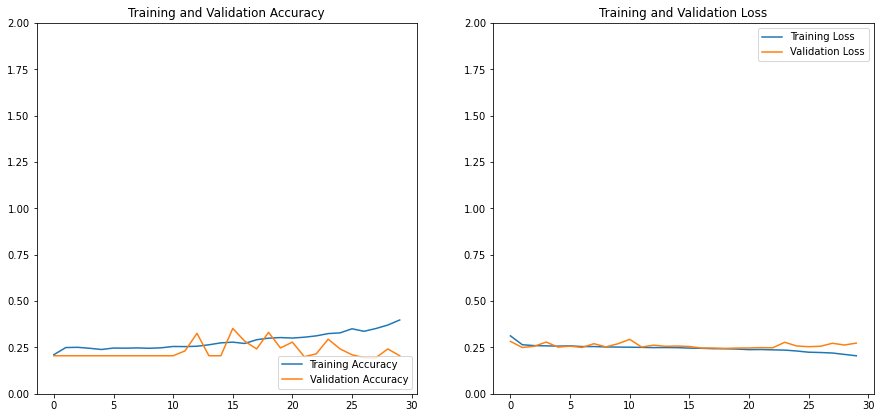

6/6 [==============================] - 0s 16ms/step - loss: 0.2735 - accuracy: 0.2053
Test Loss and Test Accuracy is 0.2734580338001251 and 0.205263152718544


In [18]:
analysis(history)
loss,acc=k.model.evaluate(x_test,y_test)
print("Test Loss and Test Accuracy is {} and {}".format(loss,acc))

In [19]:
from model import Pretrained
model1=Pretrained(lr,len(classes),'VGG')
history1 = model1.train(x_train,y_train,x_valid,y_valid,epoch,batch_size,'./vgg')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_max_pooling2d (Global (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

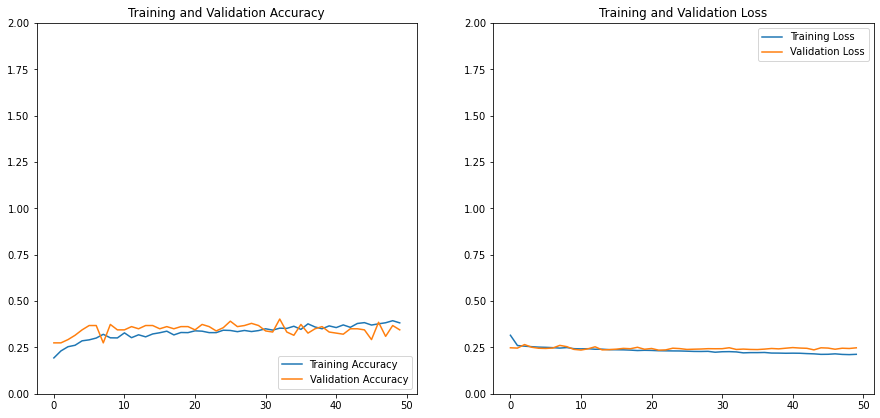

6/6 [==============================] - 2s 396ms/step - loss: 0.2353 - accuracy: 0.3053
Test Loss and Test Accuracy is 0.23526087403297424 and 0.3052631616592407


In [20]:
analysis(history1)
loss1,acc1=model1.model.evaluate(x_test,y_test)
print("Test Loss and Test Accuracy is {} and {}".format(loss1,acc1))

In [21]:
model2=Pretrained(lr,len(genre),'Resnet')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)              

In [22]:
history2=model2.train(x_train,y_train,x_valid,y_valid,epoch,batch_size,'./resnet')

Epoch 1/50
49/49 [==============================] - 10s 136ms/step - loss: 0.4048 - accuracy: 0.1599 - val_loss: 0.2531 - val_accuracy: 0.3099
INFO:tensorflow:Assets written to: ./resnet/assets
Epoch 2/50
49/49 [==============================] - 5s 109ms/step - loss: 0.2709 - accuracy: 0.2292 - val_loss: 0.2456 - val_accuracy: 0.2749
Epoch 3/50
49/49 [==============================] - 5s 111ms/step - loss: 0.2603 - accuracy: 0.2482 - val_loss: 0.2461 - val_accuracy: 0.2749
Epoch 4/50
49/49 [==============================] - 5s 112ms/step - loss: 0.2599 - accuracy: 0.2633 - val_loss: 0.2585 - val_accuracy: 0.2807
Epoch 5/50
49/49 [==============================] - 6s 113ms/step - loss: 0.2589 - accuracy: 0.2209 - val_loss: 0.2505 - val_accuracy: 0.2749
Epoch 6/50
49/49 [==============================] - 6s 114ms/step - loss: 0.2550 - accuracy: 0.2542 - val_loss: 0.2546 - val_accuracy: 0.2749
Epoch 7/50
49/49 [==============================] - 6s 113ms/step - loss: 0.2533 - accuracy: 0.2

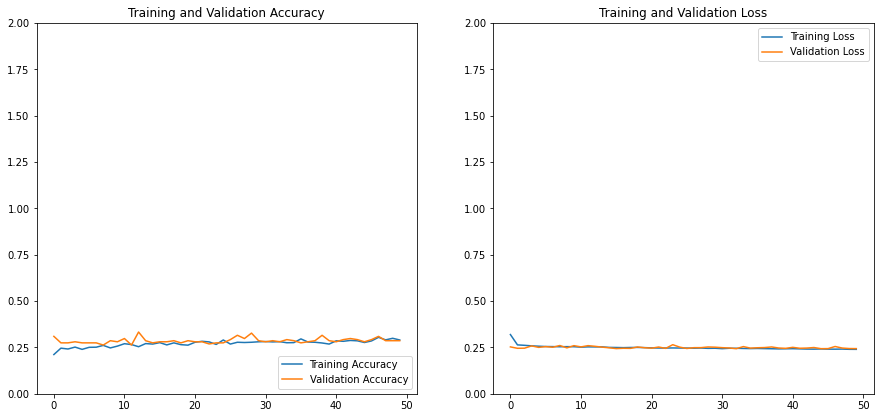

6/6 [==============================] - 1s 171ms/step - loss: 0.2431 - accuracy: 0.2421
Test Loss and Test Accuracy is 0.24310383200645447 and 0.24210526049137115


In [23]:
analysis(history2)
loss2,acc2=model2.model.evaluate(x_test,y_test)
print("Test Loss and Test Accuracy is {} and {}".format(loss2,acc2))

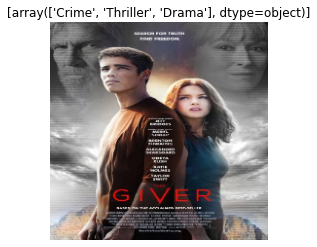

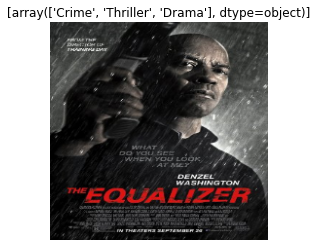

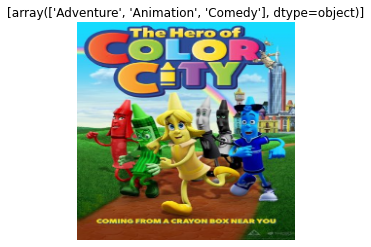

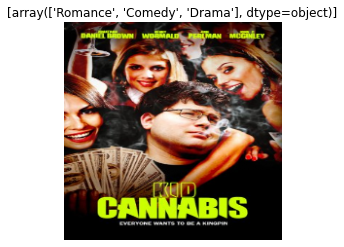

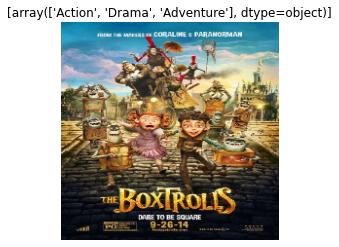

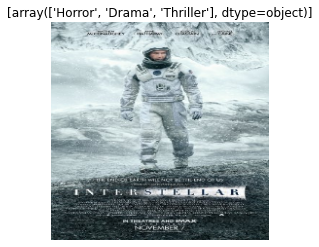

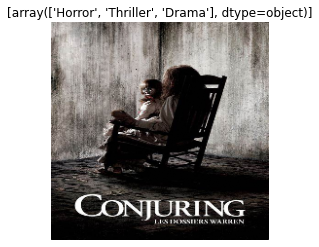

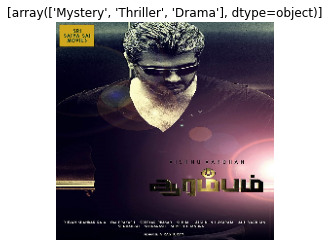

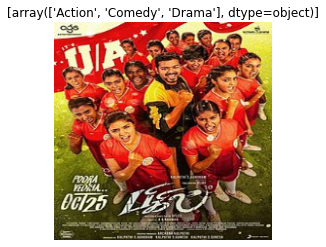

In [47]:
import cv2
import matplotlib.pyplot as plt
from predict import *
from tensorflow.keras.models import model_from_json
image_list=glob.glob('./Test/*jpg')
for image in image_list:
  x=[]
  y=preprocess(image,size=224)
  x.append(preprocess(image,size=224))
  x=np.asarray(x)
  x=x.astype('float32')
  with open('VGG.json','r') as f:
      json_model=f.read()
  model=model_from_json(json_model)
  model.load_weights('VGG.h5')
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  result=model.predict(x)
  indices=list(np.argpartition(result,-3)[:,-3:])
  predicted=[]
  for i in indices:
      predicted.append(genre[i])  
  plt.imshow(y)
  plt.axis('off')
  plt.title(predicted)
  plt.show()

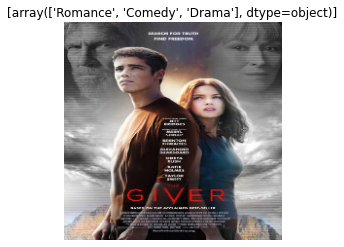

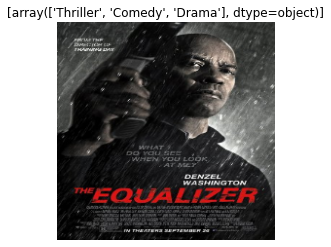

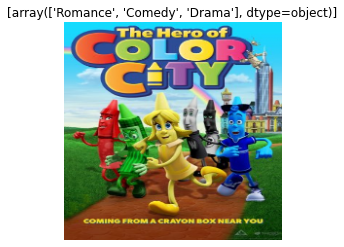

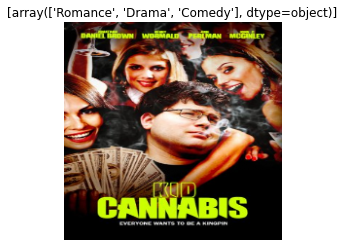

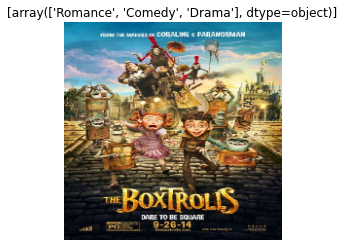

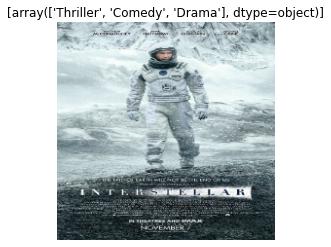

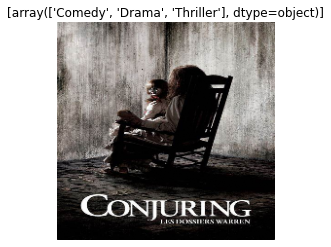

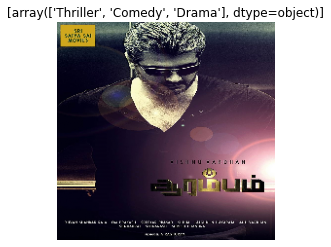

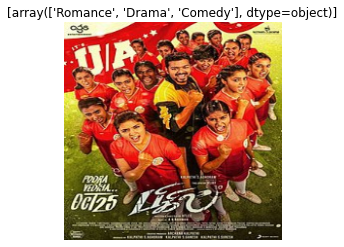

In [49]:
for image in image_list:
  x=[]
  y=preprocess(image,size=224)
  x.append(preprocess(image,size=224))
  x=np.asarray(x)
  x=x.astype('float32')
  with open('Resnet.json','r') as f:
      json_model=f.read()
  model=model_from_json(json_model)
  model.load_weights('Resnet.h5')
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  result=model.predict(x)
  indices=list(np.argpartition(result,-3)[:,-3:])
  predicted=[]
  for i in indices:
      predicted.append(genre[i])  
  plt.imshow(y)
  plt.axis('off')
  plt.title(predicted)
  plt.show()

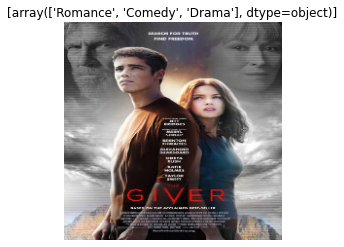

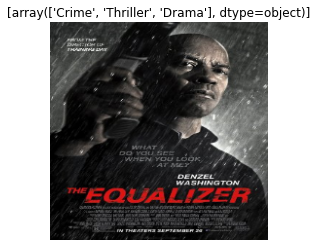

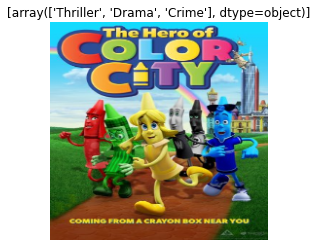

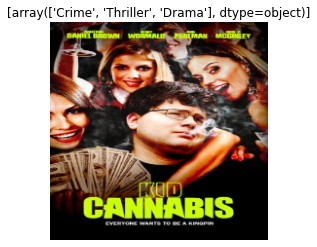

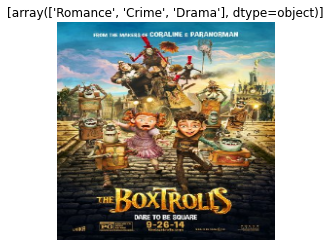

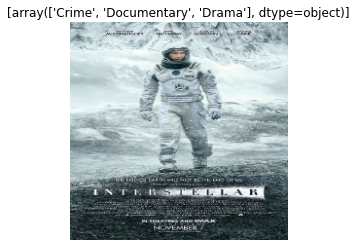

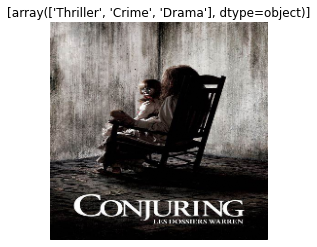

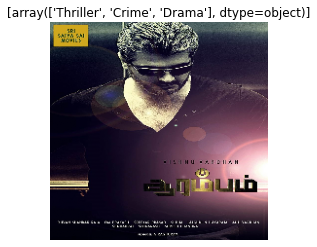

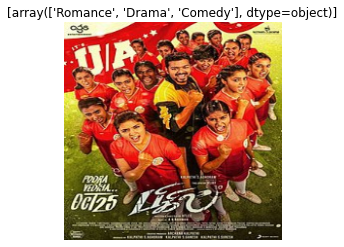

In [50]:
for image in image_list:
  x=[]
  y=preprocess(image,size=224)
  x.append(preprocess(image,size=224))
  x=np.asarray(x)
  x=x.astype('float32')
  with open('model.json','r') as f:
      json_model=f.read()
  model=model_from_json(json_model)
  model.load_weights('model1.h5')
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  result=model.predict(x)
  indices=list(np.argpartition(result,-3)[:,-3:])
  predicted=[]
  for i in indices:
      predicted.append(genre[i])  
  plt.imshow(y)
  plt.axis('off')
  plt.title(predicted)
  plt.show()